In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import random

Nodes in the subgraph of Facebook dataset: [1984, 2054, 1991, 136, 2055, 2031, 1967, 2033, 1940, 2043]
Edges in the subgraph of Facebook dataset: [(1984, 2033), (1984, 2055), (1984, 2043), (2054, 136), (2054, 1940), (1991, 136), (2055, 2033), (2033, 2043)]


Text(0.5, 1.0, 'subgraph of Facebook-Ego Network')

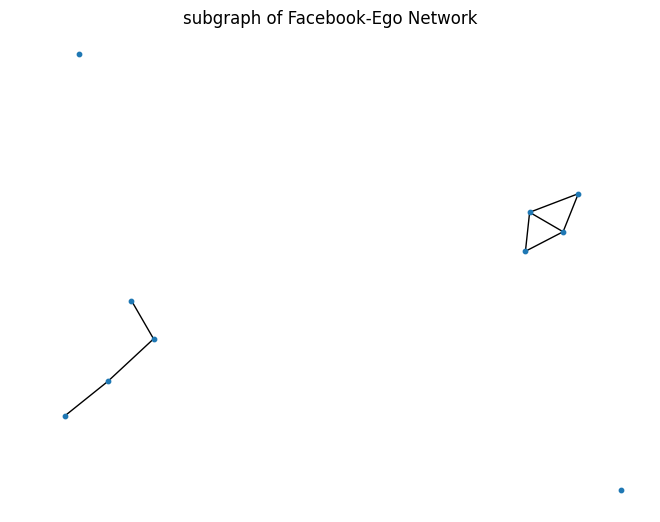

In [42]:
# loading our networks
G_fb = nx.read_edgelist("Group7/Facebook-Ego/1912.edges", create_using = nx.Graph(), nodetype = int)
random.seed(42)
fb_nodes = random.sample(list(G_fb.nodes()), 10)

# Create subgraph views of the induced subgraphs
subgraph_fb = G_fb.subgraph(fb_nodes)
# Print the nodes in the subgraphs
print("Nodes in the subgraph of Facebook dataset:", subgraph_fb.nodes())
print("Edges in the subgraph of Facebook dataset:", subgraph_fb.edges())


pos = nx.spring_layout(subgraph_fb, seed=42)  
nx.draw(subgraph_fb, pos, node_size=10)
plt.title("subgraph of Facebook-Ego Network")

Nodes in the subgraph of Twitter dataset: [25541185, 14269220, 14664047, 10798802, 14737363, 8541492, 17794004, 13894102, 14561173, 6290462]
Edges in the subgraph of Twitter dataset: [(14269220, 13894102), (14269220, 8541492), (14664047, 6290462), (8541492, 14269220), (8541492, 10798802), (17794004, 8541492), (17794004, 14269220), (17794004, 13894102), (13894102, 14269220), (14561173, 14269220)]


Text(0.5, 1.0, 'subgraph of Twitter-Ego network')

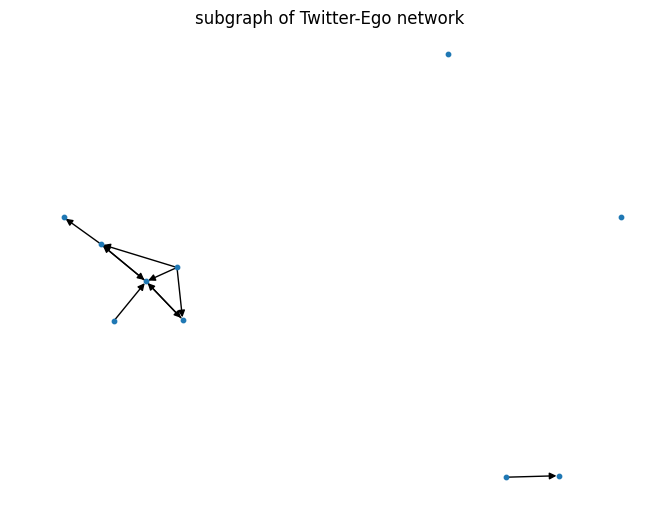

In [43]:
G_tw = nx.read_edgelist("Group7/Twitter-Ego/2841151.edges", create_using = nx.DiGraph(), nodetype = int)
twitter_nodes = random.sample(list(G_tw.nodes()), 10)
subgraph_twitter = G_tw.subgraph(twitter_nodes)
print("Nodes in the subgraph of Twitter dataset:", subgraph_twitter.nodes())
print("Edges in the subgraph of Twitter dataset:", subgraph_twitter.edges())

pos = nx.spring_layout(subgraph_twitter, seed=42)  
nx.draw(subgraph_twitter, pos, node_size=10)
plt.title("subgraph of Twitter-Ego network")


2) Three algorithms for community detection:

    1.Agglomerative Hierarchical Clustering: Bottom-up clustering that merges data points based on similarity to form a hierarchical cluster tree.

    2.Divisive Hierarchical Clustering, Girvan-Newman algorithm: Top-down clustering that recursively divides clusters into subclusters based on dissimilarity to create a hierarchical cluster tree.

    3.Louvain Algorithm: Efficient community detection algorithm optimizing modularity to identify densely connected groups in networks.

## Community detection on the facebook network

In [33]:
# a)Agglomerative Hierarchical Clustering:
# This function uses Clauset-Newman-Moore greedy modularity maximization
# to find the community partition with the largest modularity.

agglomerative_communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G_fb)
print("number of Agglomerative communities:",len(agglomerative_communities))



# b)Girvan-Newman Algorithm
# The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph.
# The algorithm removes the “most valuable” edge, traditionally the edge with the highest betweenness centrality.
girvan_newman_communities = nx.algorithms.community.centrality.girvan_newman(G_fb)
# Set the stopping criterion of minimal number of communities to 10, 
limited_girvan_newman_communities = next(gn_communities for gn_communities in girvan_newman_communities if len(gn_communities) <= 10)  
print("number of Girvan-Newman communities:",len(limited_girvan_newman_communities))


# c) Louvain Algorithm
# Louvain Community Detection Algorithm is a simple method to extract the community structure of a network. 
# This is a heuristic method based on modularity optimization.
louvain_communities = nx.community.louvain_communities(G_fb)
print("number of Louvain communities:",len(louvain_communities))


number of Agglomerative communities: 8
number of Girvan-Newman communities: 6
number of Louvain communities: 8


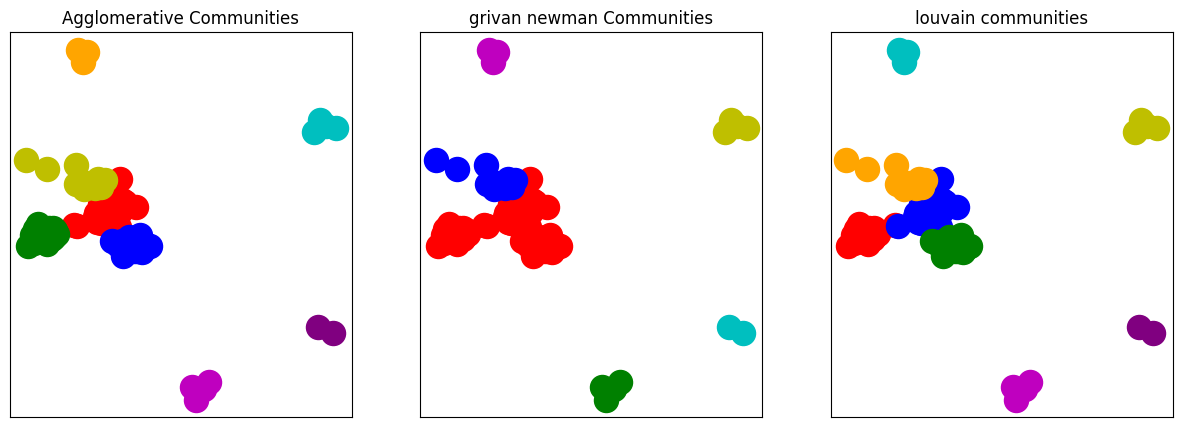

In [39]:
pos = nx.spring_layout(G_fb)  
colors = colors = ['r', 'b', 'g', 'y', 'm', 'c', 'orange', 'purple'] 

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Agglomerative Hierarchical Clustering subplot
axes[0].set_title('Agglomerative Communities')
for i, comm in enumerate(agglomerative_communities):
    nx.draw_networkx_nodes(G_fb, pos, nodelist=comm, node_color=colors[i], ax=axes[0], label=f'Community {i+1}')

# girvan newman subplot
axes[1].set_title('grivan newman Communities')
for i, comm in enumerate(limited_girvan_newman_communities):
    nx.draw_networkx_nodes(G_fb, pos, nodelist=comm, node_color=colors[i], ax=axes[1], label=f'Community {i+1}')

# louvain Algorithm subplot
axes[2].set_title('louvain communities')
for i, comm in enumerate(louvain_communities):
    nx.draw_networkx_nodes(G_fb, pos, nodelist=comm, node_color=colors[i], ax=axes[2], label=f'Community {i+1}')
plt.show()

## The differences between the community detection result:
The louvain and the agglomerative community detection algorithms both have resulted in 8 communities, on the other hand , the griven newman algorithm resulted on 6 communities and that depends on the stopping criteria of course.
The differences in the community detection results arise due to the various ways each algorithm interprets the relationships between nodes. Factors such as the network's inherent structure, the specific algorithm used, and the chosen parameters all contribute to the distinct partitioning of the network into communities. 
